In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') #resimler 28x28 boyutlarında olduğu için 28x28=784

In [4]:
type(mnist),type(mnist["data"]),type(mnist["target"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [34]:
X, y = mnist["data"], mnist["target"]

In [35]:
X = X / 255.0

In [36]:
X.shape

(70000, 784)

In [37]:
y.shape

(70000,)

In [13]:
import matplotlib.pyplot as plt

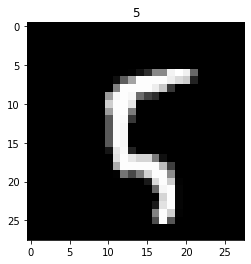

In [18]:
i=100
img_1=X[i,:].reshape(28,28)
plt.imshow(img_1,cmap='gray')
plt.title(y[i])
plt.show()

In [22]:
y[1]

1.0

In [38]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [39]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [40]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

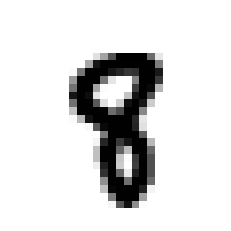

[0.]


In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [41]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [42]:
epsilon=1e-5
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat+epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat+epsilon),(1-Y)) ) )

    return L

In [43]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6780211644256914
Epoch 100 cost:  7.076902320959276e-06
Epoch 200 cost:  6.788042310395334e-06
Epoch 300 cost:  6.5095366694105145e-06
Epoch 400 cost:  6.2408235413021445e-06
Epoch 500 cost:  5.981381523350084e-06
Epoch 600 cost:  5.730726063487384e-06
Epoch 700 cost:  5.488406237169822e-06
Epoch 800 cost:  5.254001858304988e-06
Epoch 900 cost:  5.027120884411433e-06
Epoch 1000 cost:  4.807397081508445e-06
Epoch 1100 cost:  4.594487918813504e-06
Epoch 1200 cost:  4.388072667200993e-06
Epoch 1300 cost:  4.187850678699883e-06
Epoch 1400 cost:  3.993539827179657e-06
Epoch 1500 cost:  3.804875092808119e-06
Epoch 1600 cost:  3.6216072750061037e-06
Epoch 1700 cost:  3.4435018204477784e-06
Epoch 1800 cost:  3.2703377542419437e-06
Epoch 1900 cost:  3.101906703817452e-06
Final cost: 2.939629116885352e-06


In [47]:
y_test[0,100]=1.0

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[9999    1]
 [   0    0]]


In [49]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
